In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# Import data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
# Inspect first row and label of training data
print(train_data[0], '\n', train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 
 1


In [10]:
# Decode a review back to English words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [11]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

# Preparing the data

- You can't feed lists of integers into a neural network. You have to turn your lists into tensors.

### 2 ways to turn lists into tensors:

- Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indicies), and then use as the first layer in your network as a layer capable of handling such integer tensors (the Embedding layer)

- One-hot encode your lists to turn them into vectors of 0s and 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [12]:
import numpy as np

In [13]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to ones
        results[i, sequence] = 1.
    return results

# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# Inspect the first row of data after vectorizing it
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# You should also vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the neural network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Create a validation set from the training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 413us/sample - loss: 0.5346 - accuracy: 0.7765 - val_loss: 0.4026 - val_accuracy: 0.8671
Epoch 2/20
15000/15000 [==============================] - 4s 273us/sample - loss: 0.3188 - accuracy: 0.9017 - val_loss: 0.3156 - val_accuracy: 0.8835
Epoch 3/20
15000/15000 [==============================] - 4s 263us/sample - loss: 0.2319 - accuracy: 0.9266 - val_loss: 0.2834 - val_accuracy: 0.8887
Epoch 4/20
15000/15000 [==============================] - 4s 250us/sample - loss: 0.1796 - accuracy: 0.9434 - val_loss: 0.2737 - val_accuracy: 0.8908
Epoch 5/20
15000/15000 [==============================] - 4s 259us/sample - loss: 0.1475 - accuracy: 0.9522 - val_loss: 0.2852 - val_accuracy: 0.8860
Epoch 6/20
15000/15000 [==============================] - 4s 236us/sample - loss: 0.1191 - accuracy: 0.9641 - val_loss: 0.2915 - val_accuracy: 0.8852
Epoch 7/20
15000/15000 [==========================

In [22]:
# Inspect results
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the training and validation loss

In [23]:
import matplotlib.pyplot as plt

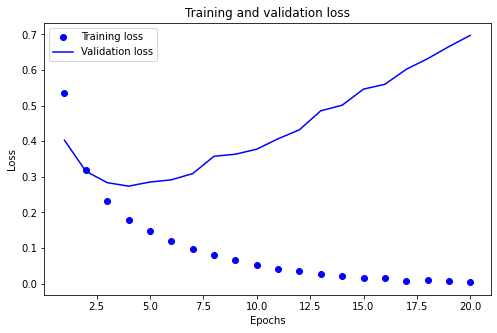

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

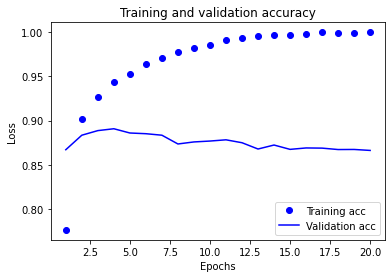

In [28]:
# plt.clf()   # Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Retraining a model from scratch

In [29]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 197us/sample - loss: 0.4977 - accuracy: 0.8123
Epoch 2/4
25000/25000 [==============================] - 4s 168us/sample - loss: 0.2905 - accuracy: 0.9051
Epoch 3/4
25000/25000 [==============================] - 4s 176us/sample - loss: 0.2160 - accuracy: 0.9242
Epoch 4/4
25000/25000 [==============================] - 8s 305us/sample - loss: 0.2984 - accuracy: 0.8804


### Using a trained network to generate predictions on new data

In [30]:
model.predict(x_test)

array([[0.16345815],
       [0.99992156],
       [0.7760556 ],
       ...,
       [0.08794662],
       [0.07405253],
       [0.47649908]], dtype=float32)

# Further experiments

In [31]:
# Adding a third Dense layer
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 203us/sample - loss: 0.4742 - accuracy: 0.8154
Epoch 2/4
25000/25000 [==============================] - 4s 177us/sample - loss: 0.2604 - accuracy: 0.9078
Epoch 3/4
25000/25000 [==============================] - 4s 169us/sample - loss: 0.1968 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 6s 231us/sample - loss: 0.3281 - accuracy: 0.8739


In [32]:
# Increasing number of output neurons
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 7s 285us/sample - loss: 0.4401 - accuracy: 0.8116
Epoch 2/4
25000/25000 [==============================] - 5s 213us/sample - loss: 0.2415 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 5s 197us/sample - loss: 0.1861 - accuracy: 0.9305
Epoch 4/4
25000/25000 [==============================] - 6s 239us/sample - loss: 0.3161 - accuracy: 0.8806


In [33]:
# Changing the optimizer to adam
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 191us/sample - loss: 0.4889 - accuracy: 0.7782
Epoch 2/4
25000/25000 [==============================] - 4s 168us/sample - loss: 0.2282 - accuracy: 0.9178
Epoch 3/4
25000/25000 [==============================] - 5s 182us/sample - loss: 0.1622 - accuracy: 0.9441
Epoch 4/4
25000/25000 [==============================] - 5s 211us/sample - loss: 0.3479 - accuracy: 0.8742


In [34]:
# Changing the loss function
# Changing the optimizer to adam
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 187us/sample - loss: 0.1811 - accuracy: 0.7945
Epoch 2/4
25000/25000 [==============================] - 5s 183us/sample - loss: 0.0749 - accuracy: 0.9094
Epoch 3/4
25000/25000 [==============================] - 5s 184us/sample - loss: 0.0499 - accuracy: 0.9403
Epoch 4/4
25000/25000 [==============================] - 6s 250us/sample - loss: 0.0915 - accuracy: 0.8772


In [44]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10000,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 6s 220us/sample - loss: 0.6086 - accuracy: 0.7763
Epoch 2/4
25000/25000 [==============================] - 4s 173us/sample - loss: 0.3775 - accuracy: 0.8872
Epoch 3/4
25000/25000 [==============================] - 4s 164us/sample - loss: 0.2534 - accuracy: 0.9153
Epoch 4/4
25000/25000 [==============================] - 6s 227us/sample - loss: 0.2839 - accuracy: 0.8866


In [47]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10000,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=256)

# Evaluate model on test set
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 6s 223us/sample - loss: 0.5743 - accuracy: 0.7989
Epoch 2/4
25000/25000 [==============================] - 5s 194us/sample - loss: 0.3159 - accuracy: 0.9050
Epoch 3/4
25000/25000 [==============================] - 5s 195us/sample - loss: 0.2160 - accuracy: 0.9255
Epoch 4/4
25000/25000 [==============================] - 6s 225us/sample - loss: 0.2918 - accuracy: 0.8857
